# **EXPLORATORY DATA ANALYSIS**

In [ ]:
#problem statement
#dataset contain used cars that sold in India as well important features of these cars
#if user can predict the price of the car

In [ ]:
#car_name:Car's full name includes brand and specific model name

#brand:brand name of the particular car

#model:exact model name of the car of a particular brand

#seller type:which type of seller of selling the used car

#km_driven:how many km car has driven

#fuel_type:Fuel used

#transmission_type:transmission used in the car

#vehicle_age:count of year since car was brought

#mileage:mileage of the car in kmpl
#engine:it is the engine capacity in cc(cubic cm)

#max_power:Max power it produces in BHP

#seats:total number of seats in car

#selling_price:sale price which was put up on website(Target variable)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('car.csv')

# **Understanding dataset**

In [ ]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df.shape

(15411, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


# **Data cleaning**

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df.drop('car_name',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0
max_power,0


In [ ]:
df.duplicated().sum()

167

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(15244, 12)

In [ ]:
num_feature=[f for f in df.columns if df[f].dtype!='O']
cat_feature=[f for f in df.columns if df[f].dtype=='O']
print('Numerical feature:',num_feature)
print('Categorical feature:',cat_feature)

Numerical feature: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
Categorical feature: ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


# **Descriptive statistics**

In [ ]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326161,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.808760,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
for i in cat_feature:
    print(df[i].value_counts())


brand
Maruti           4933
Hyundai          2952
Honda            1476
Mahindra          999
Toyota            789
Ford              776
Volkswagen        614
Renault           527
BMW               436
Tata              421
Skoda             333
Mercedes-Benz     332
Audi              190
Datsun            170
Jaguar             58
Land Rover         50
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus               9
Isuzu               7
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64
model
i20             898
Swift Dzire     875
Swift           774
Alto            768
City            750
               ... 
Ghibli            1
C                 1
Ghost             1
Quattroporte      1
Gurkha            1
Name: count, Length: 120, dtype: int64

In [ ]:
df['seats'].unique()

array([5, 8, 7, 6, 4, 2, 9, 0])

In [ ]:
x = df['seats'].mode()[0]  # Get the most common value (mode)
df['seats'] = df['seats'].replace(0, x)

In [ ]:
df['seats'].unique()

array([5, 8, 7, 6, 4, 2, 9])

# **Univariant analysis**

array([[<Axes: title={'center': 'vehicle_age'}>,
        <Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>,
        <Axes: title={'center': 'seats'}>],
       [<Axes: title={'center': 'selling_price'}>, <Axes: >, <Axes: >]],
      dtype=object)

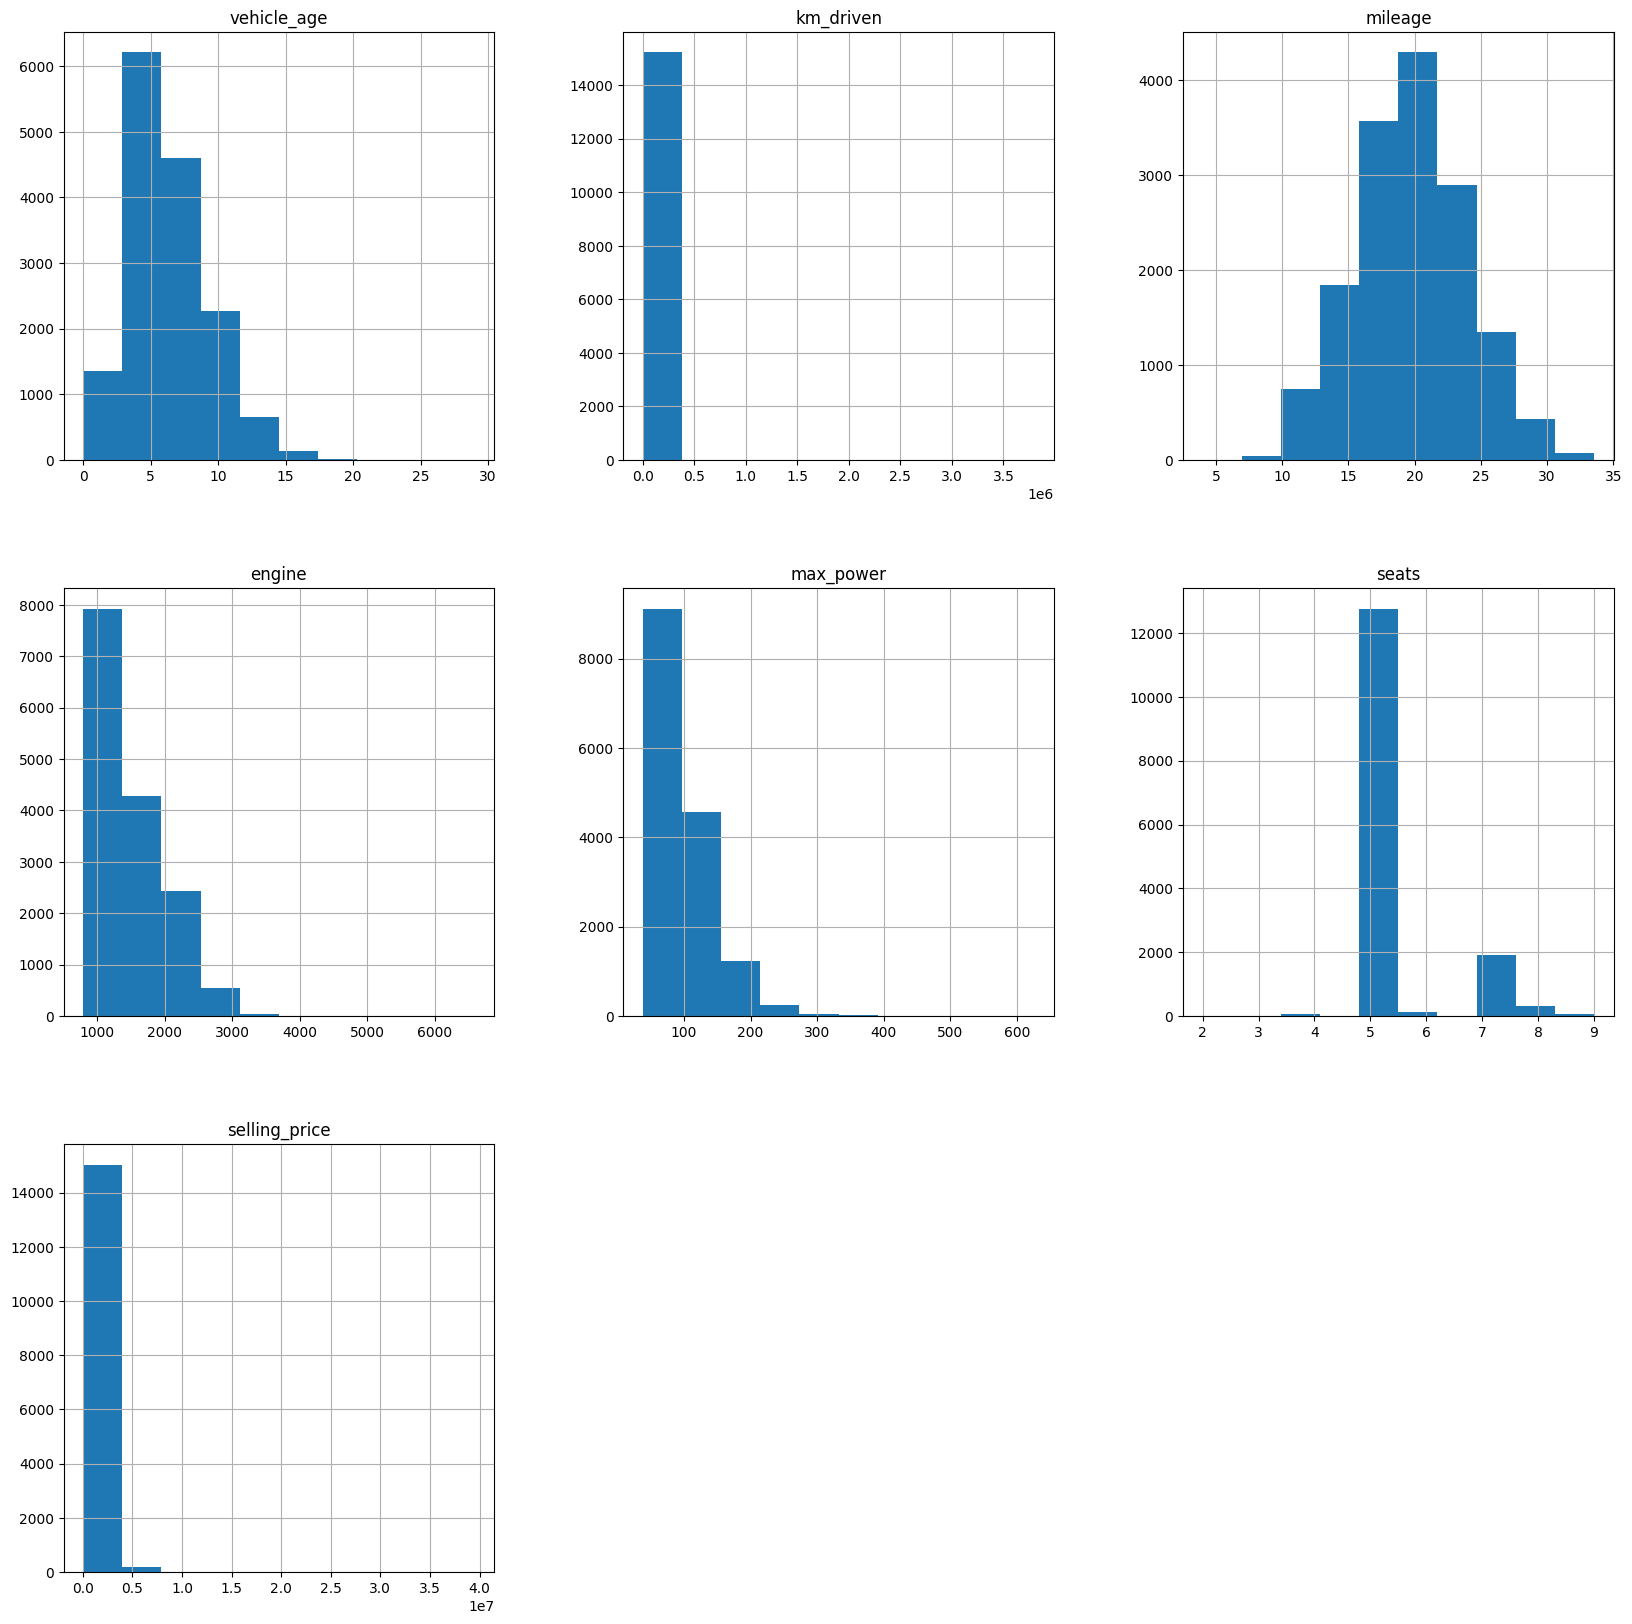

In [ ]:
df.hist(figsize=(20,20))

<Axes: xlabel='count', ylabel='brand'>

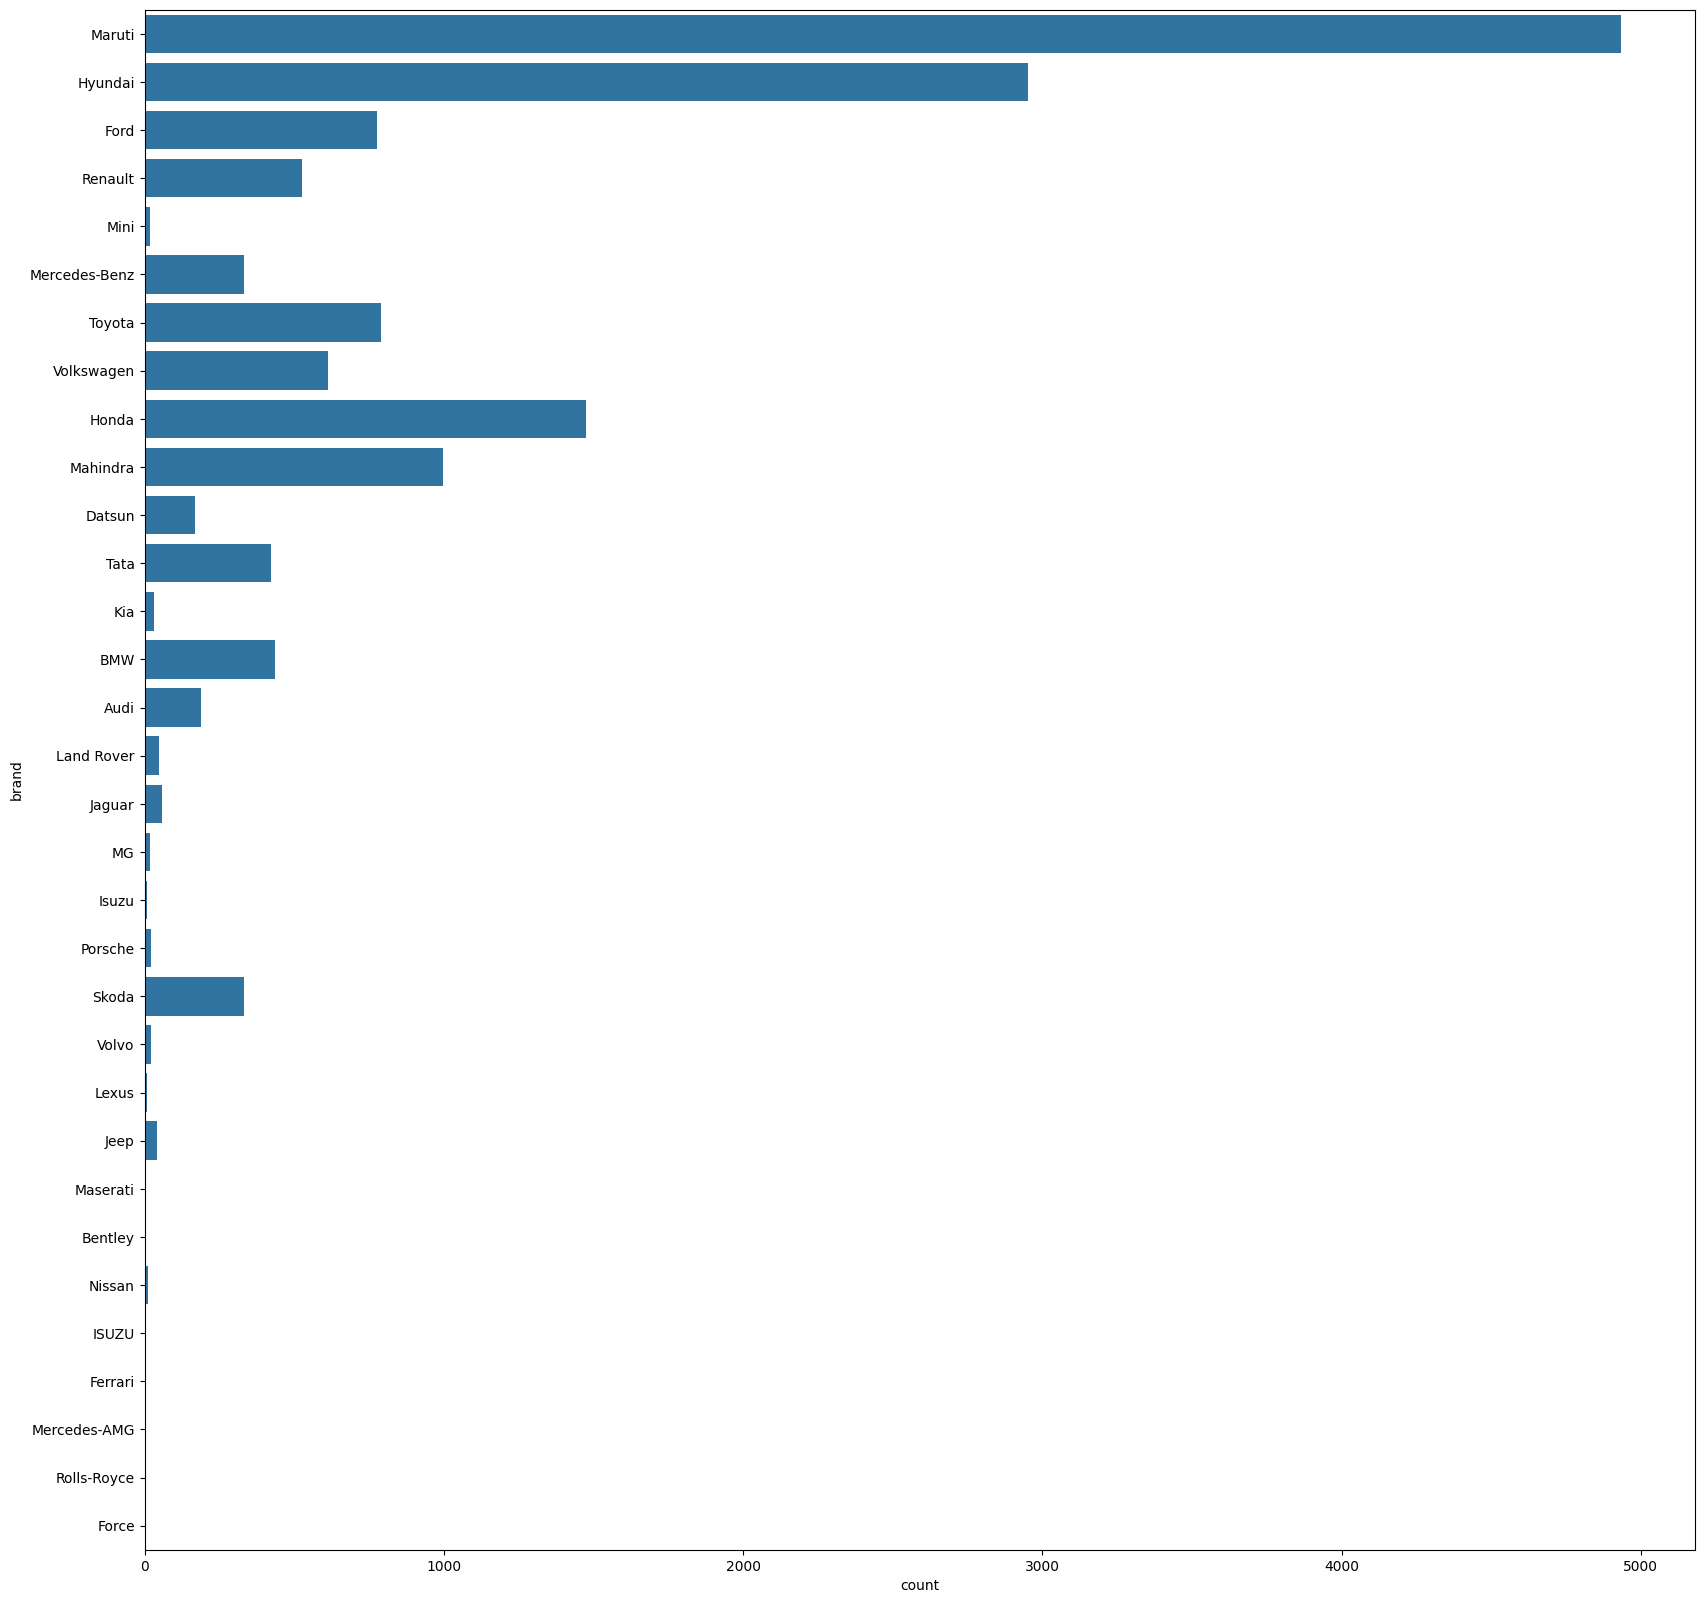

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(df['brand'])

<Axes: xlabel='transmission_type', ylabel='count'>

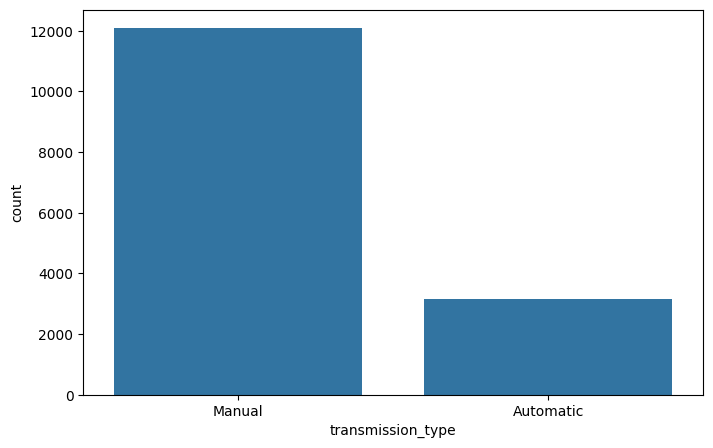

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['transmission_type'])

<Axes: xlabel='fuel_type', ylabel='count'>

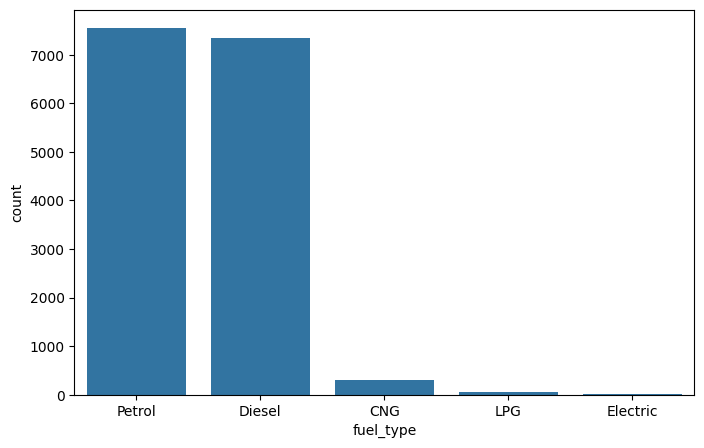

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['fuel_type'])

<Axes: xlabel='seller_type', ylabel='count'>

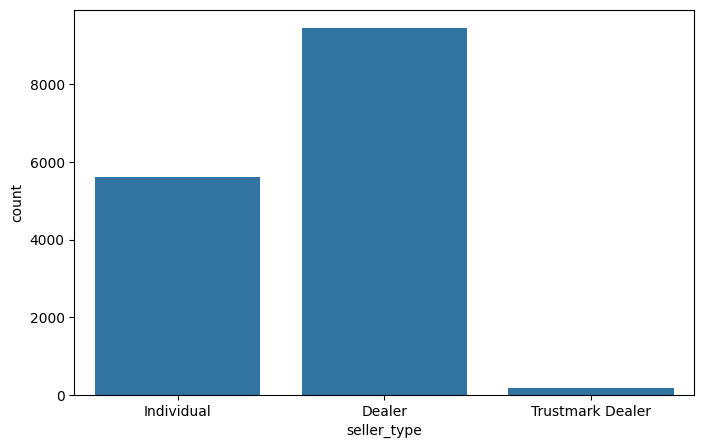

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['seller_type'])

# **Bivariant**

<Axes: xlabel='km_driven', ylabel='selling_price'>

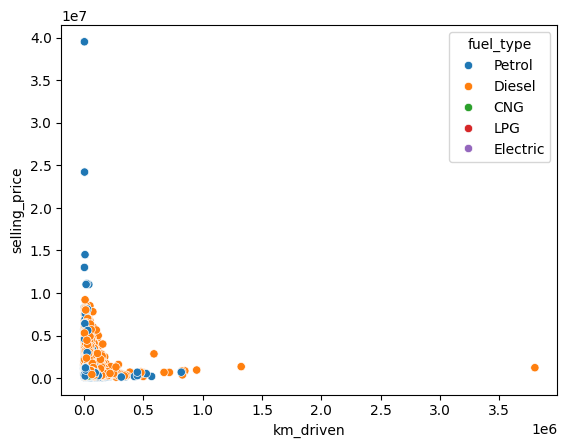

In [ ]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'],hue=df['fuel_type'])

Text(0.5, 1.0, 'Selling Price vs Vehicle Age')

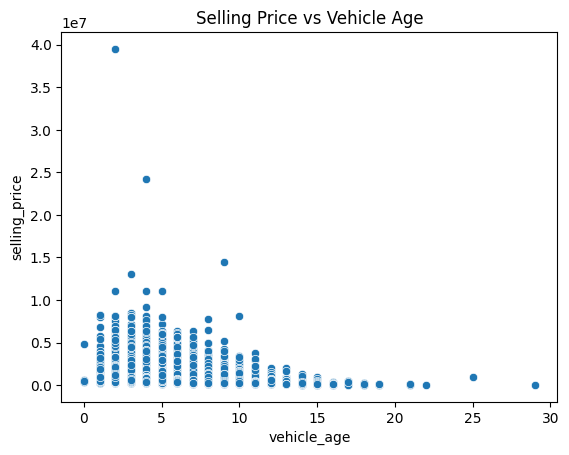

In [ ]:
sns.scatterplot(data=df,x="vehicle_age", y="selling_price")
plt.title("Selling Price vs Vehicle Age")



Older vehicles generally sell for less.

Text(0.5, 1.0, 'Selling Price vs Mileage')

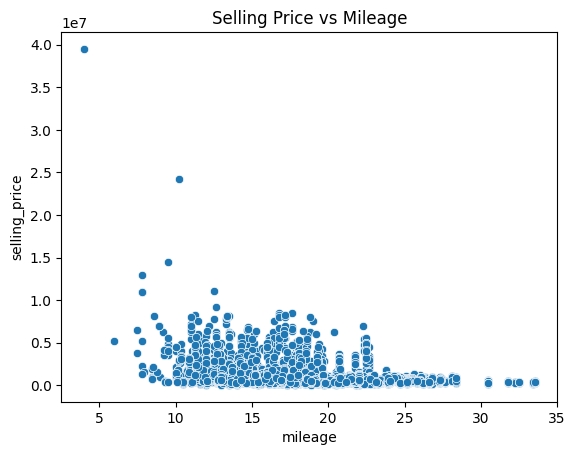

In [ ]:
sns.scatterplot(data=df, x="mileage", y="selling_price")
plt.title("Selling Price vs Mileage")

Text(0.5, 1.0, 'Selling Price vs engine')

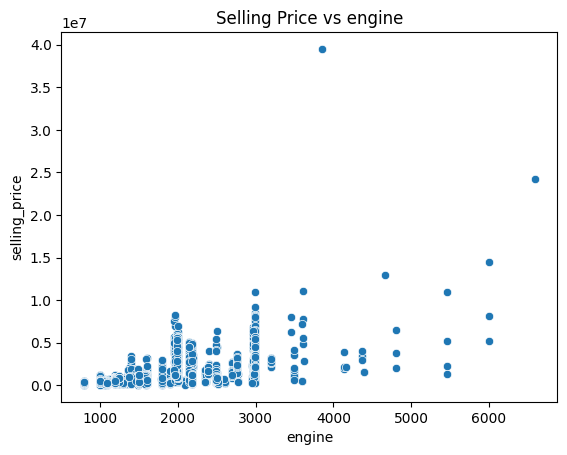

In [ ]:
sns.scatterplot(data=df, x="engine", y="selling_price")
plt.title("Selling Price vs engine")

<Axes: xlabel='fuel_type', ylabel='selling_price'>

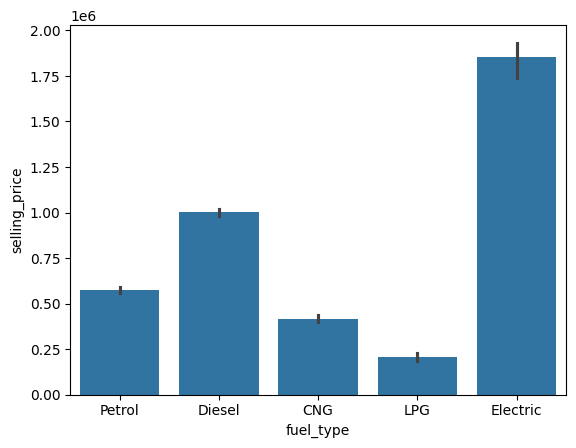

In [ ]:
sns.barplot(x='fuel_type',y='selling_price',data=df)

<Axes: xlabel='transmission_type', ylabel='selling_price'>

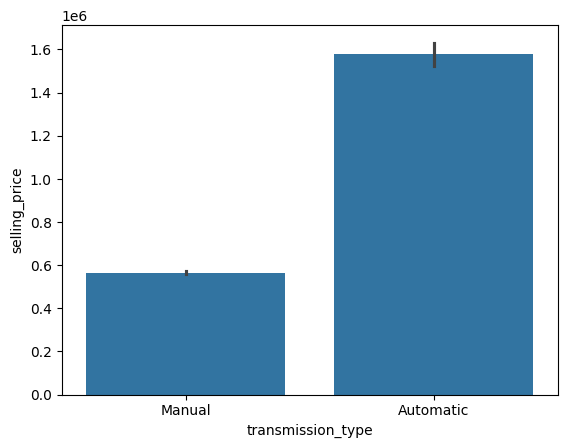

In [ ]:
sns.barplot(x='transmission_type',y='selling_price',data=df)

# **Multivariant Analysis**

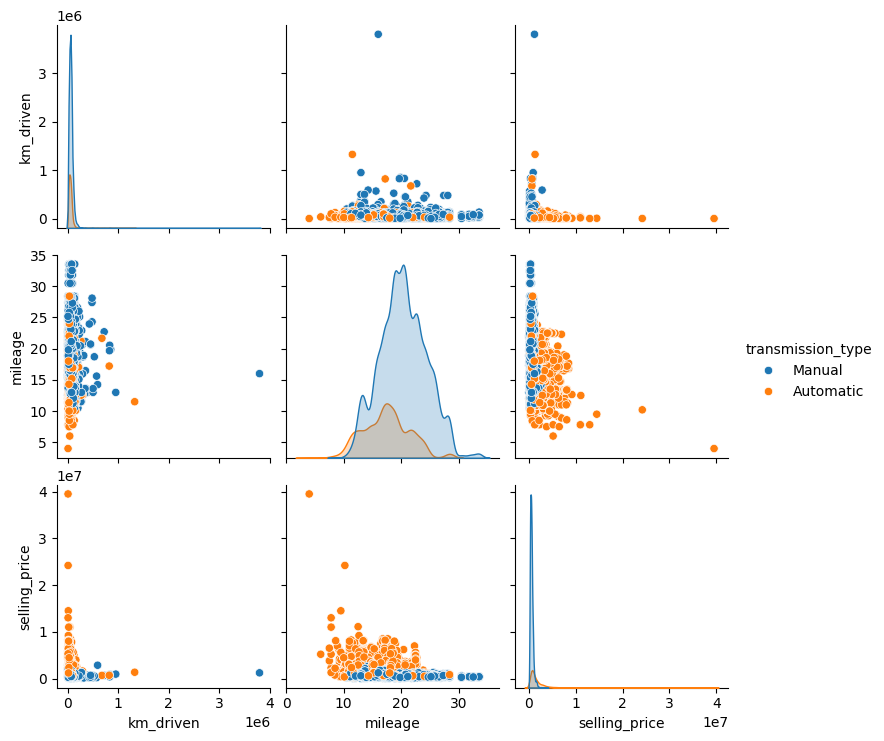

In [ ]:
sns.pairplot(df[['km_driven','mileage','selling_price','transmission_type']],hue='transmission_type')
plt.show()

In [ ]:
c=df[num_feature].corr()
c

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.332725,-0.257599,0.098734,0.004356,0.031422,-0.241228
km_driven,0.332725,1.000000,-0.104979,0.192721,0.044776,0.192092,-0.079548
mileage,-0.257599,-0.104979,1.000000,-0.632161,-0.532172,-0.441879,-0.305128
engine,0.098734,0.192721,-0.632161,1.000000,0.807287,0.552956,0.585713
max_power,0.004356,0.044776,-0.532172,0.807287,1.000000,0.172824,0.751058
seats,0.031422,0.192092,-0.441879,0.552956,0.172824,1.000000,0.115499
selling_price,-0.241228,-0.079548,-0.305128,0.585713,0.751058,0.115499,1.000000


here selling price is negative correlate with vehicle age,km driven,mileage,so when these features increase,selling price decrease

<Axes: >

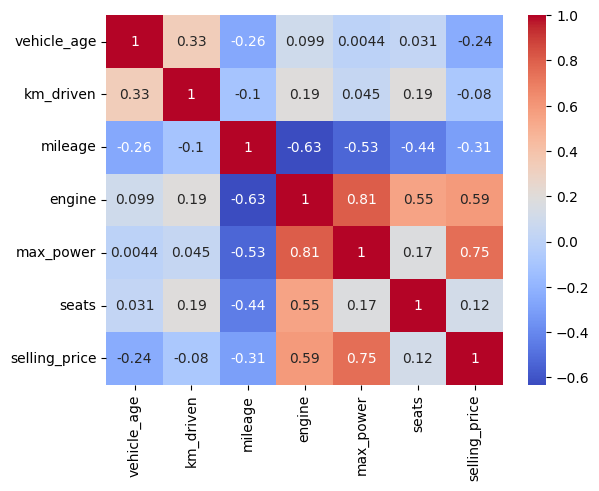

In [ ]:
sns.heatmap(c,annot=True,cmap='coolwarm')

# **Outlier detection**

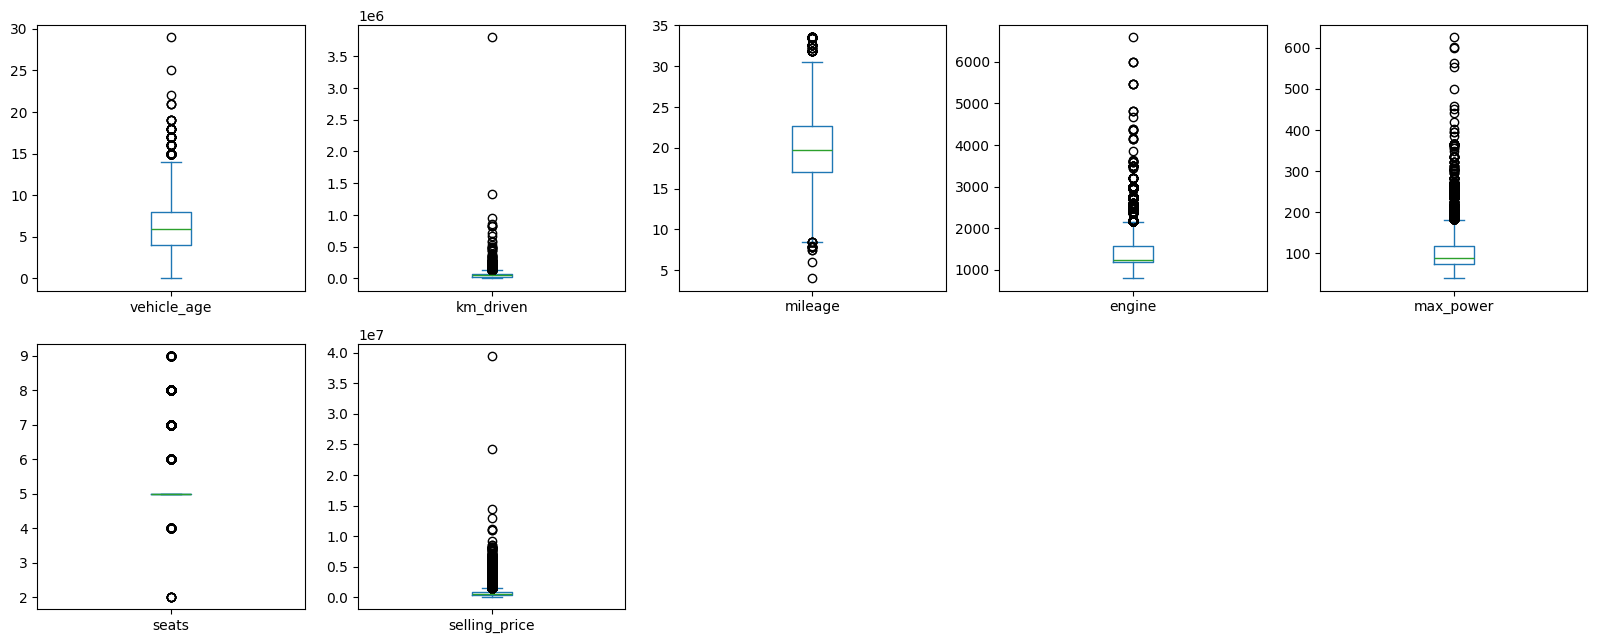

In [ ]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))
plt.show()

In [ ]:
x=['selling_price','km_driven', 'engine', 'max_power']
for i in x:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    l=q1-2.5*(iqr)
    u=q1+2.5*(iqr)
    df=df[(df[i]>=l) & (df[i]<=u)]

In [ ]:
df.shape

(11799, 12)

# **FEATURE ENGINEERING**

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a=['brand','model','seller_type','transmission_type','fuel_type']
for i in a:
    df[i]=le.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11799 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              11799 non-null  int64  
 1   model              11799 non-null  int64  
 2   vehicle_age        11799 non-null  int64  
 3   km_driven          11799 non-null  int64  
 4   seller_type        11799 non-null  int64  
 5   fuel_type          11799 non-null  int64  
 6   transmission_type  11799 non-null  int64  
 7   mileage            11799 non-null  float64
 8   engine             11799 non-null  int64  
 9   max_power          11799 non-null  float64
 10  seats              11799 non-null  int64  
 11  selling_price      11799 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1.2 MB


In [ ]:
# Log transformation of 'selling_price' to reduce skewness
df['selling_price'] = np.log1p(df['selling_price'])  # Calculating the natural logarithm

In [ ]:
df['vehicle_age'] = np.log1p(df['vehicle_age'])

In [ ]:
df['max_power'] = np.log1p(df['max_power'])

In [ ]:
df['km_driven'] = np.log1p(df['km_driven'])

In [ ]:
df['engine'] = np.log1p(df['engine'])

# **Dimentionality Reduction**

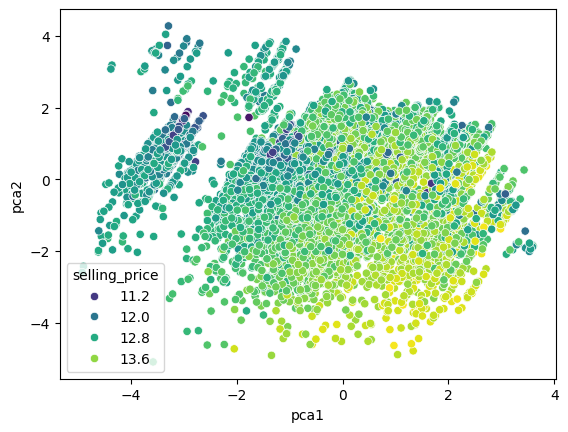

Scaled Data:
 [[ 1.07660392  1.48631433 -0.38304909 ...  1.12730784  0.80487589
   0.37944572]
 [-0.09684521 -0.92489236 -0.61472331 ...  1.12730784  0.80487589
   0.37944572]
 [ 1.49542604  0.55352178 -1.16494958 ...  1.12730784  0.80487589
   0.37944572]
 ...
 [-1.68911646 -1.06667394 -1.0201532  ... -0.79232056  0.80487589
   0.37944572]
 [ 0.25726385  0.70202048  0.0339645  ... -0.79232056 -1.15766402
   0.37944572]
 [-1.68911646 -1.50458283 -0.87535681 ... -0.79232056  0.80487589
  -2.63542303]]
PCA Transformed Data:
 [[-3.07070222  1.37298077]
 [-0.69389483 -1.02604081]
 [-0.1457019   0.05346236]
 ...
 [ 0.2950516  -1.96034197]
 [ 1.89047131  0.9025591 ]
 [ 1.45453913 -3.47325399]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Standardize the features before PCA

features=['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power','seller_type','fuel_type','transmission_type']
scaler=StandardScaler()
X=scaler.fit_transform(df[features])

#apply PCA
pca=PCA(n_components=2)
pca_r=pca.fit_transform(X)

#add PCA result to the dataframe
df['pca1']=pca_r[:,0]
df['pca2']=pca_r[:,1]


#visualize PCA results
sns.scatterplot(x='pca1',y='pca2',hue='selling_price',data=df,palette='viridis')
plt.show()

print("Scaled Data:\n", X)
print("PCA Transformed Data:\n", pca_r)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#standardization(mean=0,std=1)
scaler=StandardScaler()
df[features]=scaler.fit_transform(df[features])
#std_df=pd.DataFrame(X,columns=features)
print(df[features])

#normalization(scailing to 0-1 range)
minmax_scaler=MinMaxScaler()
df[features]=minmax_scaler.fit_transform(df[features])
#norm_df=pd.DataFrame(Y,columns=features)
print(df[features])


       vehicle_age  km_driven   mileage    engine  max_power  seller_type  \
0         1.076604   1.486314 -0.383049 -2.498993  -2.528151     1.127308   
1        -0.096845  -0.924892 -0.614723 -0.182334  -0.040361     1.127308   
2         1.495426   0.553522 -1.164950 -0.182334  -0.148271     1.127308   
3         1.076604  -0.097036 -0.029746 -1.214909  -0.915723     1.127308   
4         0.257264  -0.379260  0.506001  1.091771   0.765798    -0.792321   
...            ...        ...       ...       ...        ...          ...   
15405    -0.096845  -1.965593 -0.614723 -0.182334  -0.040361    -0.792321   
15406     1.076604  -1.763697 -0.351194 -0.735029  -0.854433    -0.792321   
15407    -1.689116  -1.066674 -1.020153  0.596828   0.419894    -0.792321   
15408     0.257264   0.702020  0.033965  1.091771   0.979555    -0.792321   
15410    -1.689116  -1.504583 -0.875357  1.087978   1.538660    -0.792321   

       fuel_type  transmission_type  
0       0.804876           0.379446  

# **Initial Modeling and Hypothesis**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Data preparation: Select features and target variable
X = df[features] # Features(independent variables)
y = df['selling_price']  # Target variable(dependent variables)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression() #create linear regression
model.fit(X_train, y_train) #fit the model into training data

# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Baseline model Mean Absolute Error: {mae}")
print(f"Baseline model Mean Squared Error: {mse}")
print(f"Baseline model R-squared: {r2}")



[13.34914526 13.15306357 13.30971479 ... 12.75262099 13.52133324
 12.63753094]
Baseline model Mean Absolute Error: 0.18148598707840208
Baseline model Mean Squared Error: 0.05334508016075945
Baseline model R-squared: 0.7880123866564901


In [ ]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with selling_price': df.corr()['selling_price'].sort_values(ascending=False)
}
print("EDA summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

EDA summary:
Dataset Shape: (11799, 14)
Missing Values: 0
Correlation with selling_price: selling_price        1.000000
max_power            0.606190
engine               0.523013
pca1                 0.454015
seats                0.131629
mileage              0.072687
model               -0.020602
brand               -0.052768
seller_type         -0.077709
transmission_type   -0.224579
fuel_type           -0.248691
km_driven           -0.268537
pca2                -0.332105
vehicle_age         -0.665226
Name: selling_price, dtype: float64
